In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install tensorflow-estimator
!pip install tensorflow-text
!pip install protobuf~=3.20.3
!pip install tensorflow_datasets
!pip install tensorflow-text

In [3]:
import logging
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds
import tensorflow as tf

import tensorflow_text

In [4]:
path = '/content/gdrive/MyDrive/tam_eng/combined_data.csv'
data = pd.read_csv(path)

In [5]:
data

,English,Tamil
0,"moreover all the vessels , which king ahaz in ...",ராஜாவாகிய ஆகாஸ் அரசாளும்போது தம்முடைய பாதகத்தி...
1,similar conditions will be imposed if the sri ...,சர்வதேச நாணய நிதியம் இலங்கைக்கு கடன் வழங்கினால...
2,now kornelius argues the opposite instead of e...,தற்போது அதற்கு எதிராக வாதாடுகிறார் சர்வதேச சட...
3,chrysler the third largest us automaker filed ...,அமெரிக்காவின் மூன்றாம் பெரிய கார் தயாரிப்பு நி...
4,"moreover , khan has been in exile in iran for ...",மேலும் இனைவிட்டு தலிபானால் வெளியேற்றப்பட்ட 199...
...,...,...
289446,attacking the ltte for holding onto a separati...,பிரிவினைவாத நிகழ்ச்சி நிரலைக் கொண்டுள்ளதற்காக...
289447,among the bushes they brayed; under the nettle...,"செடிகளுக்குள்ளிருந்து கதறி, காஞ்செறிகளின்கீழ் ..."
289448,"then shall you be clear from this my oath, whe...","நீ என் இனத்தாரிடத்திற்குப் போனால், என் ஆணைக்கு..."
289449,"five thousand striking employees in dongguan, ...",அக்டோபர் 6-ல் பிரதான தொழில் உற்பத்தி நகரமான ...


In [7]:
features = data['Tamil'].values
labels = data['English'].values
dataset = tf.data.Dataset.from_tensor_slices((features, labels))

In [8]:
len(data)

289451

In [9]:
total_samples = len(data)

# Define the percentage of data to be used for validation
validation_percentage = 0.2

# Calculate the number of samples to use for validation
validation_size = int(total_samples * validation_percentage)

# Split the dataset into training and validation sets
train_examples = dataset.skip(validation_size)
val_examples = dataset.take(validation_size)

In [10]:
for ta, en in train_examples.take(1):
  tamil = ta.numpy().decode('utf-8')
  eng = en.numpy().decode('utf-8')
  print(tamil)
  print(eng)

நடிகைகளிலேயே நான் மட்டும்தான் அதிகமாக கிசுகிசுக்களில் சிக்கியிருப்பேன் .
yet , i am being involved repeatedly in gossip .


In [11]:
for ta_examples, en_examples in train_examples.batch(3).take(1):
  print('> Examples in english:')
  for en in en_examples.numpy():
    print(en.decode('utf-8'))
  print()

  print('> Examples in tamil:')
  for ta in ta_examples.numpy():
    print(ta.decode('utf-8'))

> Examples in english:
yet , i am being involved repeatedly in gossip .
some people may have had ' a sneaking admiration ' for his protest , he added , because , ' it is right to say that the thatcher years engendered a great deal of personal feeling .
every sunday they have to go to the navy office and sign in .

> Examples in tamil:
நடிகைகளிலேயே நான் மட்டும்தான் அதிகமாக கிசுகிசுக்களில் சிக்கியிருப்பேன் .
அதற்கு ஏற்ப உங்களுக்கு தியாகிகள் என்ற புகழ் மகுடம் காத்திருக்கிறது என்று அவர் குறிப்பிட்டார் .
ஒவ்வொரு ஞாயிறும் அவர்கள் கடற்படை அலுவலகத்திற்கு சென்று கையெழுத்துப்போட வேண்டும் .


In [12]:
model_name = '/content/gdrive/MyDrive/tam_eng/ted_hrlr_translate_ta_en_converter'
tokenizers = tf.saved_model.load(model_name)

In [13]:
[item for item in dir(tokenizers.en) if not item.startswith('_')]

['detokenize',
 'get_reserved_tokens',
 'get_vocab_path',
 'get_vocab_size',
 'lookup',
 'tokenize',
 'tokenizer',
 'vocab']

In [14]:
print('> This is a batch of strings:')
for en in en_examples.numpy():
  print(en.decode('utf-8'))

> This is a batch of strings:
yet , i am being involved repeatedly in gossip .
some people may have had ' a sneaking admiration ' for his protest , he added , because , ' it is right to say that the thatcher years engendered a great deal of personal feeling .
every sunday they have to go to the navy office and sign in .


In [15]:
encoded = tokenizers.en.tokenize(en_examples)

print('> This is a padded-batch of token IDs:')
for row in encoded.to_list():
  print(row)

> This is a padded-batch of token IDs:
[2, 400, 15, 49, 349, 200, 742, 1596, 87, 239, 1512, 2725, 17, 3]
[2, 199, 128, 226, 102, 120, 10, 41, 59, 7314, 2063, 41, 153, 2323, 2127, 10, 90, 104, 607, 15, 98, 1004, 15, 206, 15, 10, 95, 89, 249, 86, 307, 88, 83, 5025, 193, 4592, 4033, 1434, 133, 41, 317, 529, 84, 1564, 5197, 17, 3]
[2, 267, 1042, 108, 102, 86, 239, 86, 83, 2085, 512, 85, 1405, 87, 17, 3]


In [16]:
round_trip = tokenizers.en.detokenize(encoded)

print('> This is human-readable text:')
for line in round_trip.numpy():
  print(line.decode('utf-8'))

> This is human-readable text:
yet , i am being involved repeatedly in gossip .
some people may have had ' a sneaking admiration ' for his protest , he added , because , ' it is right to say that the thatcher years engendered a great deal of personal feeling .
every sunday they have to go to the navy office and sign in .


In [17]:
print('> This is the text split into tokens:')
tokens = tokenizers.en.lookup(encoded)
tokens

> This is the text split into tokens:


<tf.RaggedTensor [[b'[START]', b'yet', b',', b'i', b'am', b'being', b'involved',
  b'repeatedly', b'in', b'go', b'##ss', b'##ip', b'.', b'[END]'],
 [b'[START]', b'some', b'people', b'may', b'have', b'had', b"'", b'a', b's',
  b'##nea', b'##king', b'a', b'##d', b'##mi', b'##ration', b"'", b'for',
  b'his', b'protest', b',', b'he', b'added', b',', b'because', b',', b"'",
  b'it', b'is', b'right', b'to', b'say', b'that', b'the', b'thatcher',
  b'years', b'en', b'##gen', b'##der', b'##ed', b'a', b'great', b'deal',
  b'of', b'personal', b'feeling', b'.', b'[END]']                           ,
 [b'[START]', b'every', b'sunday', b'they', b'have', b'to', b'go', b'to',
  b'the', b'navy', b'office', b'and', b'sign', b'in', b'.', b'[END]']    ]>

In [19]:
lengths = []

for ta_examples, en_examples in train_examples.batch(1024):
  en_tokens = tokenizers.en.tokenize(en_examples)
  lengths.append(en_tokens.row_lengths())

  ta_tokens = tokenizers.ta.tokenize(ta_examples)
  lengths.append(ta_tokens.row_lengths())
  print('.', end='', flush=True)

...................................................................................................................................................................................................................................

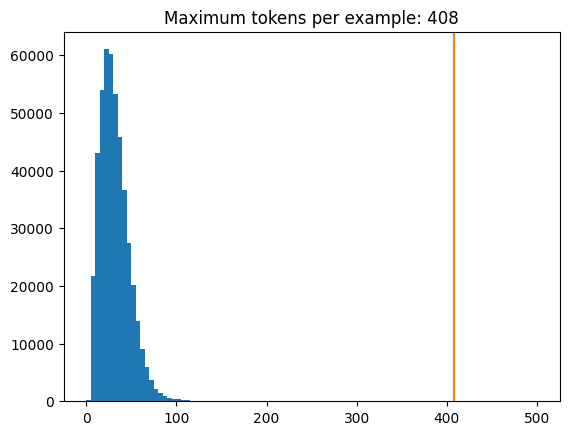

In [20]:
all_lengths = np.concatenate(lengths)

plt.hist(all_lengths, np.linspace(0, 500, 101))
plt.ylim(plt.ylim())
max_length = max(all_lengths)
plt.plot([max_length, max_length], plt.ylim())
plt.title(f'Maximum tokens per example: {max_length}');

In [ ]:
type(en)

bytes

In [26]:
MAX_TOKENS= 408
def prepare_batch(ta, en):
    ta = tokenizers.ta.tokenize(ta)      # Output is ragged.
    ta = ta[:, :MAX_TOKENS]    # Trim to MAX_TOKENS.
    ta = ta.to_tensor()  # Convert to 0-padded dense Tensor

    en = tokenizers.en.tokenize(en)
    en = en[:, :(MAX_TOKENS+1)]
    en_inputs = en[:, :-1].to_tensor()  # Drop the [END] tokens
    en_labels = en[:, 1:].to_tensor()   # Drop the [START] tokens

    return (ta, en_inputs), en_labels

In [31]:
MAX_TOKENS = 128

# Function to prepare a batch of data
def prepare_batch(ta, en):
    # Tokenize the English sequence using the tokenizer for English
    ta = tokenizers.ta.tokenize(ta)      # Output is ragged.
    # Trim the English sequence to a maximum of MAX_TOKENS
    ta = ta[:, :MAX_TOKENS]    # Trim to MAX_TOKENS.
    # Convert the trimmed English sequence to a 0-padded dense Tensor
    ta = ta.to_tensor()  # Convert to 0-padded dense Tensor

    # Tokenize the Tamil sequence using the tokenizer for Tamil
    en = tokenizers.en.tokenize(en)
    # Trim the Tamil sequence to a maximum of (MAX_TOKENS + 1) - Note: The +1 is for [END] token
    en = en[:, :(MAX_TOKENS+1)]
    # Create input sequences for Tamil without the last token (Drop the [END] tokens)
    en_inputs = en[:, :-1].to_tensor()  # Drop the [END] tokens
    # Create target sequences for Tamil without the first token (Drop the [START] tokens)
    en_labels = en[:, 1:].to_tensor()   # Drop the [START] tokens

    # Return a tuple containing the prepared input sequences and target sequences
    return (ta, en_inputs), en_labels


In [32]:
BUFFER_SIZE = 20000
BATCH_SIZE = 64

In [33]:
def make_batches(ds):
  return (
      ds
      .shuffle(BUFFER_SIZE)
      .batch(BATCH_SIZE)
      .map(prepare_batch, tf.data.AUTOTUNE)
      .prefetch(buffer_size=tf.data.AUTOTUNE))

In [34]:
# Create training and validation set batches.
train_batches = make_batches(train_examples)
val_batches = make_batches(val_examples)

In [36]:
for (ta, en), en_labels in train_batches.take(1):
  break

print(en.shape)
print(ta.shape)
print(en_labels.shape)

(64, 54)
(64, 60)
(64, 54)


In [37]:
print(en[0][:10])
print(en_labels[0][:10])

tf.Tensor([   2 1115  132  352   17    0    0    0    0    0], shape=(10,), dtype=int64)
tf.Tensor([1115  132  352   17    3    0    0    0    0    0], shape=(10,), dtype=int64)


In [38]:
def positional_encoding(length, depth):
  depth = depth/2

  positions = np.arange(length)[:, np.newaxis]     # (seq, 1)
  depths = np.arange(depth)[np.newaxis, :]/depth   # (1, depth)

  angle_rates = 1 / (10000**depths)         # (1, depth)
  angle_rads = positions * angle_rates      # (pos, depth)

  pos_encoding = np.concatenate(
      [np.sin(angle_rads), np.cos(angle_rads)],
      axis=-1)

  return tf.cast(pos_encoding, dtype=tf.float32)

(2048, 512)


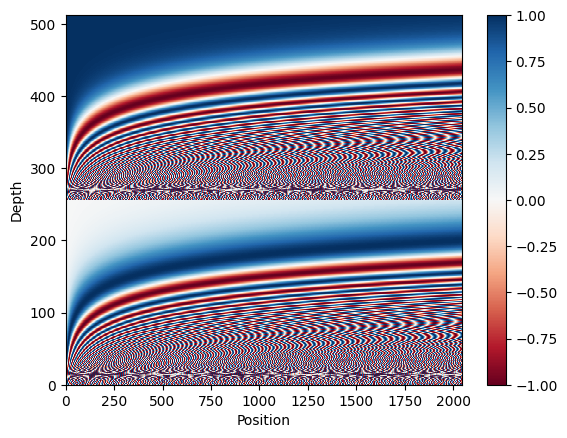

In [39]:
#@title
pos_encoding = positional_encoding(length=2048, depth=512)

# Check the shape.
print(pos_encoding.shape)

# Plot the dimensions.
plt.pcolormesh(pos_encoding.numpy().T, cmap='RdBu')
plt.ylabel('Depth')
plt.xlabel('Position')
plt.colorbar()
plt.show()

(0.0, 1.0)

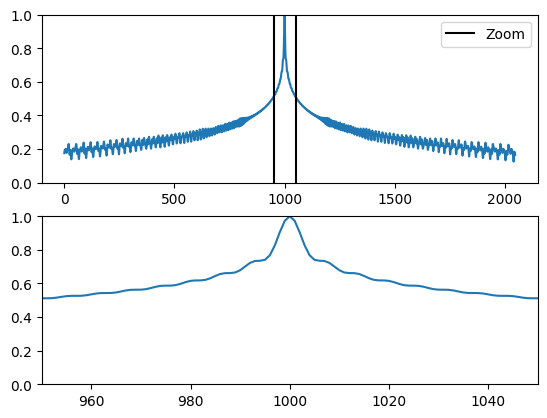

In [40]:
#@title
pos_encoding/=tf.norm(pos_encoding, axis=1, keepdims=True)
p = pos_encoding[1000]
dots = tf.einsum('pd,d -> p', pos_encoding, p)
plt.subplot(2,1,1)
plt.plot(dots)
plt.ylim([0,1])
plt.plot([950, 950, float('nan'), 1050, 1050],
         [0,1,float('nan'),0,1], color='k', label='Zoom')
plt.legend()
plt.subplot(2,1,2)
plt.plot(dots)
plt.xlim([950, 1050])
plt.ylim([0,1])


In [41]:
class PositionalEmbedding(tf.keras.layers.Layer):
  def __init__(self, vocab_size, d_model):
    super().__init__()
    self.d_model = d_model
    self.embedding = tf.keras.layers.Embedding(vocab_size, d_model, mask_zero=True)
    self.pos_encoding = positional_encoding(length=2048, depth=d_model)

  def compute_mask(self, *args, **kwargs):
    return self.embedding.compute_mask(*args, **kwargs)

  def call(self, x):
    length = tf.shape(x)[1]
    x = self.embedding(x)
    # This factor sets the relative scale of the embedding and positonal_encoding.
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x = x + self.pos_encoding[tf.newaxis, :length, :]
    return x


In [42]:
embed_en = PositionalEmbedding(vocab_size=tokenizers.en.get_vocab_size(), d_model=512)
embed_ta = PositionalEmbedding(vocab_size=tokenizers.ta.get_vocab_size(), d_model=512)

en_emb = embed_en(en)
ta_emb = embed_ta(ta)

In [43]:
en_emb._keras_mask

<tf.Tensor: shape=(64, 54), dtype=bool, numpy=
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])>

In [44]:
class BaseAttention(tf.keras.layers.Layer):
  def __init__(self, **kwargs):
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
    self.layernorm = tf.keras.layers.LayerNormalization()
    self.add = tf.keras.layers.Add()

In [45]:
class CrossAttention(BaseAttention):
  def call(self, x, context):
    attn_output, attn_scores = self.mha(
        query=x,
        key=context,
        value=context,
        return_attention_scores=True)

    # Cache the attention scores for plotting later.
    self.last_attn_scores = attn_scores

    x = self.add([x, attn_output])
    x = self.layernorm(x)

    return x

In [46]:
sample_ca = CrossAttention(num_heads=2, key_dim=512)

print(ta_emb.shape)
print(en_emb.shape)
print(sample_ca(en_emb, ta_emb).shape)

(64, 60, 512)
(64, 54, 512)
(64, 54, 512)


In [47]:
class GlobalSelfAttention(BaseAttention):
  def call(self, x):
    attn_output = self.mha(
        query=x,
        value=x,
        key=x)
    x = self.add([x, attn_output])
    x = self.layernorm(x)
    return x

In [49]:
sample_gsa = GlobalSelfAttention(num_heads=2, key_dim=512)

print(ta_emb.shape)
print(sample_gsa(ta_emb).shape)

(64, 60, 512)
(64, 60, 512)


In [50]:
class CausalSelfAttention(BaseAttention):
  def call(self, x):
    attn_output = self.mha(
        query=x,
        value=x,
        key=x,
        use_causal_mask = True)
    x = self.add([x, attn_output])
    x = self.layernorm(x)
    return x

In [52]:
sample_csa = CausalSelfAttention(num_heads=2, key_dim=512)

print(en_emb.shape)
print(sample_csa(en_emb).shape)

(64, 54, 512)
(64, 54, 512)


In [53]:
out1 = sample_csa(embed_en(en[:, :3]))
out2 = sample_csa(embed_en(en))[:, :3]

tf.reduce_max(abs(out1 - out2)).numpy()

5.9604645e-07

In [54]:
class FeedForward(tf.keras.layers.Layer):
  def __init__(self, d_model, dff, dropout_rate=0.1):
    super().__init__()
    self.seq = tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),
      tf.keras.layers.Dense(d_model),
      tf.keras.layers.Dropout(dropout_rate)
    ])
    self.add = tf.keras.layers.Add()
    self.layer_norm = tf.keras.layers.LayerNormalization()

  def call(self, x):
    x = self.add([x, self.seq(x)])
    x = self.layer_norm(x)
    return x


In [55]:
sample_ffn = FeedForward(512, 2048)

print(en_emb.shape)
print(sample_ffn(en_emb).shape)

(64, 54, 512)
(64, 54, 512)


In [56]:
class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self,*, d_model, num_heads, dff, dropout_rate=0.1):
    super().__init__()

    self.self_attention = GlobalSelfAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    self.ffn = FeedForward(d_model, dff)

  def call(self, x):
    x = self.self_attention(x)
    x = self.ffn(x)
    return x

In [57]:
sample_encoder_layer = EncoderLayer(d_model=512, num_heads=8, dff=2048)

print(ta_emb.shape)
print(sample_encoder_layer(ta_emb).shape)

(64, 60, 512)
(64, 60, 512)


In [58]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, *, num_layers, d_model, num_heads,
               dff, vocab_size, dropout_rate=0.1):
    super().__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.pos_embedding = PositionalEmbedding(
        vocab_size=vocab_size, d_model=d_model)

    self.enc_layers = [
        EncoderLayer(d_model=d_model,
                     num_heads=num_heads,
                     dff=dff,
                     dropout_rate=dropout_rate)
        for _ in range(num_layers)]
    self.dropout = tf.keras.layers.Dropout(dropout_rate)

  def call(self, x):
    # `x` is token-IDs shape: (batch, seq_len)
    x = self.pos_embedding(x)  # Shape `(batch_size, seq_len, d_model)`.

    # Add dropout.
    x = self.dropout(x)

    for i in range(self.num_layers):
      x = self.enc_layers[i](x)

    return x  # Shape `(batch_size, seq_len, d_model)`.

In [59]:
# Instantiate the encoder.
sample_encoder = Encoder(num_layers=4,
                         d_model=512,
                         num_heads=8,
                         dff=2048,
                         vocab_size=8500)

sample_encoder_output = sample_encoder(ta, training=False)

# Print the shape.
print(ta.shape)
print(sample_encoder_output.shape)  # Shape `(batch_size, input_seq_len, d_model)`.

(64, 60)
(64, 60, 512)


In [60]:
class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self,
               *,
               d_model,
               num_heads,
               dff,
               dropout_rate=0.1):
    super(DecoderLayer, self).__init__()

    self.causal_self_attention = CausalSelfAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    self.cross_attention = CrossAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    self.ffn = FeedForward(d_model, dff)

  def call(self, x, context):
    x = self.causal_self_attention(x=x)
    x = self.cross_attention(x=x, context=context)

    # Cache the last attention scores for plotting later
    self.last_attn_scores = self.cross_attention.last_attn_scores

    x = self.ffn(x)  # Shape `(batch_size, seq_len, d_model)`.
    return x

In [61]:
sample_decoder_layer = DecoderLayer(d_model=512, num_heads=8, dff=2048)

sample_decoder_layer_output = sample_decoder_layer(
    x=en_emb, context=ta_emb)

print(en_emb.shape)
print(ta_emb.shape)
print(sample_decoder_layer_output.shape)  # `(batch_size, seq_len, d_model)`

(64, 54, 512)
(64, 60, 512)
(64, 54, 512)


In [62]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self, *, num_layers, d_model, num_heads, dff, vocab_size,
               dropout_rate=0.1):
    super(Decoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.pos_embedding = PositionalEmbedding(vocab_size=vocab_size,
                                             d_model=d_model)
    self.dropout = tf.keras.layers.Dropout(dropout_rate)
    self.dec_layers = [
        DecoderLayer(d_model=d_model, num_heads=num_heads,
                     dff=dff, dropout_rate=dropout_rate)
        for _ in range(num_layers)]

    self.last_attn_scores = None

  def call(self, x, context):
    # `x` is token-IDs shape (batch, target_seq_len)
    x = self.pos_embedding(x)  # (batch_size, target_seq_len, d_model)

    x = self.dropout(x)

    for i in range(self.num_layers):
      x  = self.dec_layers[i](x, context)

    self.last_attn_scores = self.dec_layers[-1].last_attn_scores

    # The shape of x is (batch_size, target_seq_len, d_model).
    return x

In [63]:
# Instantiate the decoder.
sample_decoder = Decoder(num_layers=4,
                         d_model=512,
                         num_heads=8,
                         dff=2048,
                         vocab_size=8000)

output = sample_decoder(
    x=en,
    context=ta_emb)

# Print the shapes.
print(en.shape)
print(ta_emb.shape)
print(output.shape)

(64, 54)
(64, 60, 512)
(64, 54, 512)


In [64]:
sample_decoder.last_attn_scores.shape  # (batch, heads, target_seq, input_seq)

TensorShape([64, 8, 54, 60])

In [65]:
class Transformer(tf.keras.Model):
  def __init__(self, *, num_layers, d_model, num_heads, dff,
               input_vocab_size, target_vocab_size, dropout_rate=0.1):
    super().__init__()
    self.encoder = Encoder(num_layers=num_layers, d_model=d_model,
                           num_heads=num_heads, dff=dff,
                           vocab_size=input_vocab_size,
                           dropout_rate=dropout_rate)

    self.decoder = Decoder(num_layers=num_layers, d_model=d_model,
                           num_heads=num_heads, dff=dff,
                           vocab_size=target_vocab_size,
                           dropout_rate=dropout_rate)

    self.final_layer = tf.keras.layers.Dense(target_vocab_size)

  def call(self, inputs):
    # To use a Keras model with `.fit` you must pass all your inputs in the
    # first argument.
    context, x  = inputs

    context = self.encoder(context)  # (batch_size, context_len, d_model)

    x = self.decoder(x, context)  # (batch_size, target_len, d_model)

    # Final linear layer output.
    logits = self.final_layer(x)  # (batch_size, target_len, target_vocab_size)

    try:
      # Drop the keras mask, so it doesn't scale the losses/metrics.
      # b/250038731
      del logits._keras_mask
    except AttributeError:
      pass

    # Return the final output and the attention weights.
    return logits

In [66]:
num_layers = 4
d_model = 128
dff = 512
num_heads = 8
dropout_rate = 0.1

In [67]:
transformer = Transformer(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    input_vocab_size=tokenizers.ta.get_vocab_size().numpy(),
    target_vocab_size=tokenizers.en.get_vocab_size().numpy(),
    dropout_rate=dropout_rate)

In [69]:
output = transformer((ta, en))

print(en.shape)
print(ta.shape)
print(output.shape)

(64, 54)
(64, 60)
(64, 54, 7887)


In [70]:
attn_scores = transformer.decoder.dec_layers[-1].last_attn_scores
print(attn_scores.shape)  # (batch, heads, target_seq, input_seq)

(64, 8, 54, 60)


In [71]:
transformer.summary()

Model: "transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_1 (Encoder)         multiple                  3630848   
                                                                 
 decoder_1 (Decoder)         multiple                  5759360   
                                                                 
 dense_38 (Dense)            multiple                  1017423   
                                                                 
Total params: 10407631 (39.70 MB)
Trainable params: 10407631 (39.70 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super().__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    step = tf.cast(step, dtype=tf.float32)
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [73]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-9)

Text(0.5, 0, 'Train Step')

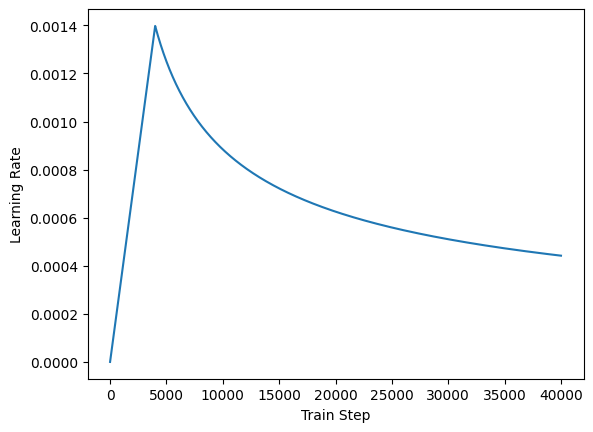

In [74]:
plt.plot(learning_rate(tf.range(40000, dtype=tf.float32)))
plt.ylabel('Learning Rate')
plt.xlabel('Train Step')

In [75]:
def masked_loss(label, pred):
  mask = label != 0
  loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')
  loss = loss_object(label, pred)

  mask = tf.cast(mask, dtype=loss.dtype)
  loss *= mask

  loss = tf.reduce_sum(loss)/tf.reduce_sum(mask)
  return loss


def masked_accuracy(label, pred):
  pred = tf.argmax(pred, axis=2)
  label = tf.cast(label, pred.dtype)
  match = label == pred

  mask = label != 0

  match = match & mask

  match = tf.cast(match, dtype=tf.float32)
  mask = tf.cast(mask, dtype=tf.float32)
  return tf.reduce_sum(match)/tf.reduce_sum(mask)

In [76]:
transformer.compile(
    loss=masked_loss,
    optimizer=optimizer,
    metrics=[masked_accuracy])

In [116]:
transformer.fit(train_batches,
                steps_per_epoch = 40,
                epochs= 10)

Epoch 1/10
40/40 [==============================] - 8s 193ms/step - loss: 2.8261 - masked_accuracy: 0.4416
Epoch 2/10
40/40 [==============================] - 8s 201ms/step - loss: 2.8394 - masked_accuracy: 0.4375
Epoch 3/10
40/40 [==============================] - 8s 196ms/step - loss: 2.9205 - masked_accuracy: 0.4268
Epoch 4/10
40/40 [==============================] - 8s 203ms/step - loss: 2.9369 - masked_accuracy: 0.4241
Epoch 5/10
40/40 [==============================] - 8s 199ms/step - loss: 2.9548 - masked_accuracy: 0.4241
Epoch 6/10
40/40 [==============================] - 8s 198ms/step - loss: 3.0164 - masked_accuracy: 0.4177
Epoch 7/10
40/40 [==============================] - 8s 200ms/step - loss: 3.0477 - masked_accuracy: 0.4149
Epoch 8/10
40/40 [==============================] - 8s 191ms/step - loss: 2.9932 - masked_accuracy: 0.4224
Epoch 9/10
40/40 [==============================] - 8s 195ms/step - loss: 3.0701 - masked_accuracy: 0.4107
Epoch 10/10
40/40 [==================

In [93]:
transformer.evaluate(val_batches, steps = 100)

905/905 [==============================] - 84s 92ms/step - loss: 3.5588 - masked_accuracy: 0.3661


[3.5587830543518066, 0.36609604954719543]

In [95]:
class Translator(tf.Module):
  def __init__(self, tokenizers, transformer):
    self.tokenizers = tokenizers
    self.transformer = transformer

  def __call__(self, sentence, max_length=MAX_TOKENS):
    # The input sentence is Portuguese, hence adding the `[START]` and `[END]` tokens.
    assert isinstance(sentence, tf.Tensor)
    if len(sentence.shape) == 0:
      sentence = sentence[tf.newaxis]

    sentence = self.tokenizers.ta.tokenize(sentence).to_tensor()

    encoder_input = sentence

    # As the output language is English, initialize the output with the
    # English `[START]` token.
    start_end = self.tokenizers.en.tokenize([''])[0]
    start = start_end[0][tf.newaxis]
    end = start_end[1][tf.newaxis]

    # `tf.TensorArray` is required here (instead of a Python list), so that the
    # dynamic-loop can be traced by `tf.function`.
    output_array = tf.TensorArray(dtype=tf.int64, size=0, dynamic_size=True)
    output_array = output_array.write(0, start)

    for i in tf.range(max_length):
      output = tf.transpose(output_array.stack())
      predictions = self.transformer([encoder_input, output], training=False)

      # Select the last token from the `seq_len` dimension.
      predictions = predictions[:, -1:, :]  # Shape `(batch_size, 1, vocab_size)`.

      predicted_id = tf.argmax(predictions, axis=-1)

      # Concatenate the `predicted_id` to the output which is given to the
      # decoder as its input.
      output_array = output_array.write(i+1, predicted_id[0])

      if predicted_id == end:
        break

    output = tf.transpose(output_array.stack())
    # The output shape is `(1, tokens)`.
    text = tokenizers.en.detokenize(output)[0]  # Shape: `()`.

    tokens = tokenizers.en.lookup(output)[0]

    # `tf.function` prevents us from using the attention_weights that were
    # calculated on the last iteration of the loop.
    # So, recalculate them outside the loop.
    self.transformer([encoder_input, output[:,:-1]], training=False)
    attention_weights = self.transformer.decoder.last_attn_scores

    return text, tokens, attention_weights

In [96]:
translator = Translator(tokenizers, transformer)

In [97]:
def print_translation(sentence, tokens, ground_truth):
  print(f'{"Input:":15s}: {sentence}')
  print(f'{"Prediction":15s}: {tokens.numpy().decode("utf-8")}')
  print(f'{"Ground truth":15s}: {ground_truth}')

In [98]:
ground_truth = 'this is a problem we have to solve .'
sentence = 'இது நாம் தீர்க்க வேண்டிய பிரச்சனை .'

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

Input:         : இது நாம் தீர்க்க வேண்டிய பிரச்சனை .
Prediction     : this is the problem that we need .
Ground truth   : this is a problem we have to solve .


In [99]:
ground_truth = 'and my neighboring homes heard about this idea .'
sentence = 'இந்த யோசனையைப் பற்றி என் பக்கத்து வீடுகள் கேள்விப்பட்டிருக்கின்றன.'

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

Input:         : இந்த யோசனையைப் பற்றி என் பக்கத்து வீடுகள் கேள்விப்பட்டிருக்கின்றன.
Prediction     : the question of this question is that the housing issue is about .
Ground truth   : and my neighboring homes heard about this idea .


In [100]:
ground_truth = "this is the first book i've ever done."
sentence= "இது நான் எழுதிய முதல் புத்தகம்."

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

Input:         : இது நான் எழுதிய முதல் புத்தகம்.
Prediction     : this is the first written of the book .
Ground truth   : this is the first book i've ever done.


In [101]:
def plot_attention_head(in_tokens, translated_tokens, attention):
  # The model didn't generate `<START>` in the output. Skip it.
  translated_tokens = translated_tokens[1:]

  ax = plt.gca()
  ax.matshow(attention)
  ax.set_xticks(range(len(in_tokens)))
  ax.set_yticks(range(len(translated_tokens)))

  labels = [label.decode('utf-8') for label in in_tokens.numpy()]
  ax.set_xticklabels(
      labels, rotation=90)

  labels = [label.decode('utf-8') for label in translated_tokens.numpy()]
  ax.set_yticklabels(labels)

In [102]:
head = 0
# Shape: `(batch=1, num_heads, seq_len_q, seq_len_k)`.
attention_heads = tf.squeeze(attention_weights, 0)
attention = attention_heads[head]
attention.shape

TensorShape([10, 10])

In [103]:
in_tokens = tf.convert_to_tensor([sentence])
in_tokens = tokenizers.ta.tokenize(in_tokens).to_tensor()
in_tokens = tokenizers.ta.lookup(in_tokens)[0]
in_tokens

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b'[START]', b'\xe0\xae\x87\xe0\xae\xa4\xe0\xaf\x81',
       b'\xe0\xae\xa8\xe0\xae\xbe\xe0\xae\xa9',
       b'\xe0\xae\x8e\xe0\xae\xb4\xe0\xaf\x81\xe0\xae\xa4\xe0\xae\xbf\xe0\xae\xaf',
       b'\xe0\xae\xae\xe0\xaf\x81\xe0\xae\xa4\xe0\xae\xb2',
       b'\xe0\xae\xaa', b'##\xe0\xaf\x81\xe0\xae\xa4\xe0\xae\xa4',
       b'##\xe0\xae\x95\xe0\xae\xae', b'.', b'[END]'], dtype=object)>

In [104]:
translated_tokens

<tf.Tensor: shape=(11,), dtype=string, numpy=
array([b'[START]', b'this', b'is', b'the', b'first', b'written', b'of',
       b'the', b'book', b'.', b'[END]'], dtype=object)>

In [105]:
def plot_attention_weights(sentence, translated_tokens, attention_heads):
  in_tokens = tf.convert_to_tensor([sentence])
  in_tokens = tokenizers.ta.tokenize(in_tokens).to_tensor()
  in_tokens = tokenizers.ta.lookup(in_tokens)[0]

  fig = plt.figure(figsize=(16, 8))

  for h, head in enumerate(attention_heads):
    ax = fig.add_subplot(2, 4, h+1)

    plot_attention_head(in_tokens, translated_tokens, head)

    ax.set_xlabel(f'Head {h+1}')

  plt.tight_layout()
  plt.show()

<ipython-input-105-a17d798efee3>:15: UserWarning: Glyph 2951 (\N{TAMIL LETTER I}) missing from current font.
  plt.tight_layout()
<ipython-input-105-a17d798efee3>:15: UserWarning: Matplotlib currently does not support Tamil natively.
  plt.tight_layout()
<ipython-input-105-a17d798efee3>:15: UserWarning: Glyph 2980 (\N{TAMIL LETTER TA}) missing from current font.
  plt.tight_layout()
<ipython-input-105-a17d798efee3>:15: UserWarning: Glyph 3009 (\N{TAMIL VOWEL SIGN U}) missing from current font.
  plt.tight_layout()
<ipython-input-105-a17d798efee3>:15: UserWarning: Glyph 2984 (\N{TAMIL LETTER NA}) missing from current font.
  plt.tight_layout()
<ipython-input-105-a17d798efee3>:15: UserWarning: Glyph 3006 (\N{TAMIL VOWEL SIGN AA}) missing from current font.
  plt.tight_layout()
<ipython-input-105-a17d798efee3>:15: UserWarning: Glyph 2985 (\N{TAMIL LETTER NNNA}) missing from current font.
  plt.tight_layout()
<ipython-input-105-a17d798efee3>:15: UserWarning: Glyph 2958 (\N{TAMIL LETTER E})

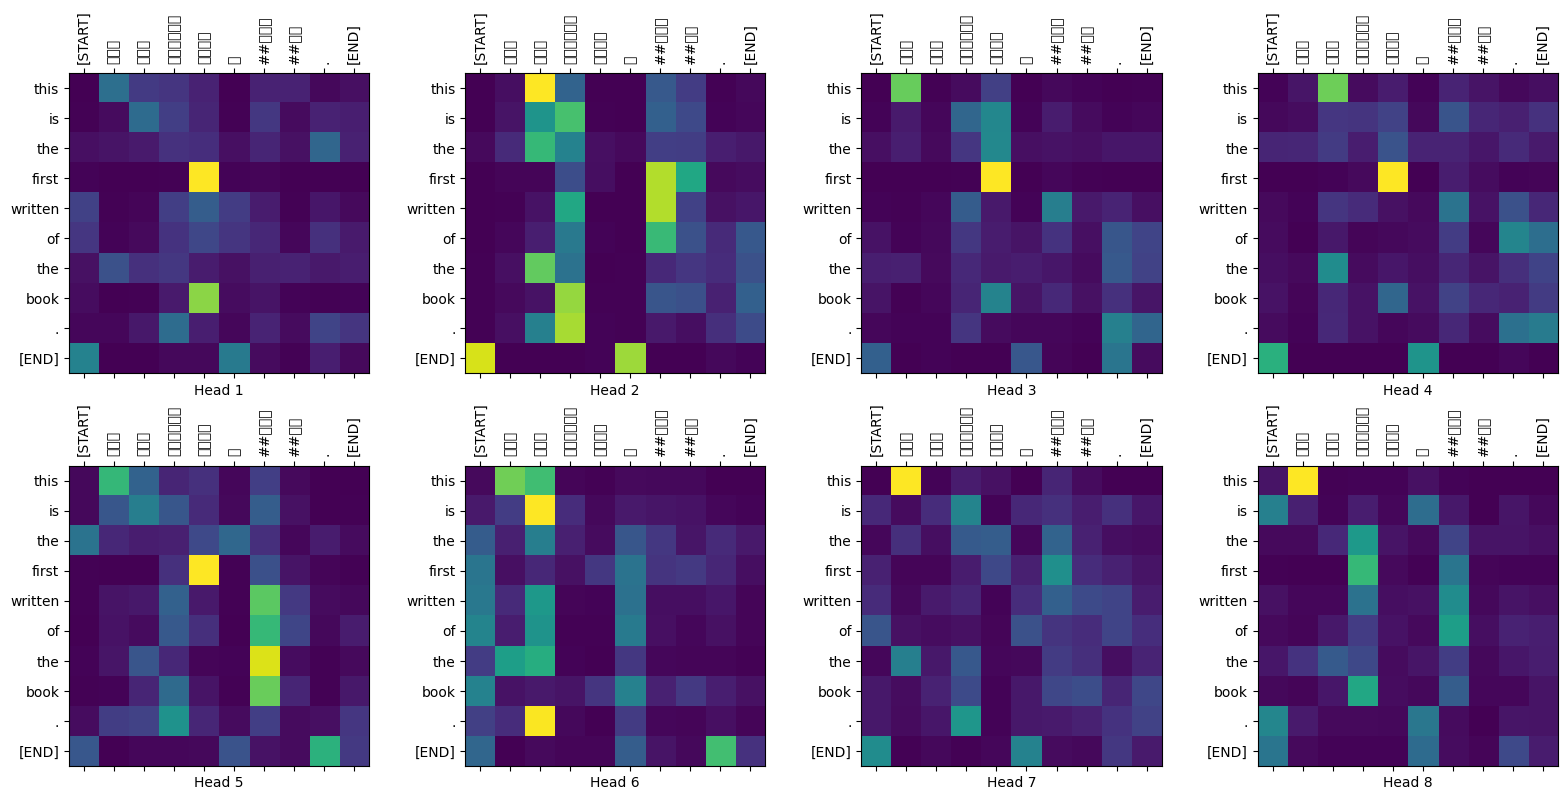

In [106]:
plot_attention_weights(sentence,
                       translated_tokens,
                       attention_weights[0])

Input:         : டிரைசெராடாப்ஸ் பற்றி என்சைக்ளோபீடியாவில் படித்தேன்.
Prediction     : i have been in australia to get the phones about the film .
Ground truth   : I read about triceratops in the encyclopedia.


<ipython-input-105-a17d798efee3>:15: UserWarning: Glyph 2975 (\N{TAMIL LETTER TTA}) missing from current font.
  plt.tight_layout()
<ipython-input-105-a17d798efee3>:15: UserWarning: Matplotlib currently does not support Tamil natively.
  plt.tight_layout()
<ipython-input-105-a17d798efee3>:15: UserWarning: Glyph 3007 (\N{TAMIL VOWEL SIGN I}) missing from current font.
  plt.tight_layout()
<ipython-input-105-a17d798efee3>:15: UserWarning: Glyph 2992 (\N{TAMIL LETTER RA}) missing from current font.
  plt.tight_layout()
<ipython-input-105-a17d798efee3>:15: UserWarning: Glyph 3016 (\N{TAMIL VOWEL SIGN AI}) missing from current font.
  plt.tight_layout()
<ipython-input-105-a17d798efee3>:15: UserWarning: Glyph 2970 (\N{TAMIL LETTER CA}) missing from current font.
  plt.tight_layout()
<ipython-input-105-a17d798efee3>:15: UserWarning: Glyph 3014 (\N{TAMIL VOWEL SIGN E}) missing from current font.
  plt.tight_layout()
<ipython-input-105-a17d798efee3>:15: UserWarning: Glyph 3006 (\N{TAMIL VOWEL S

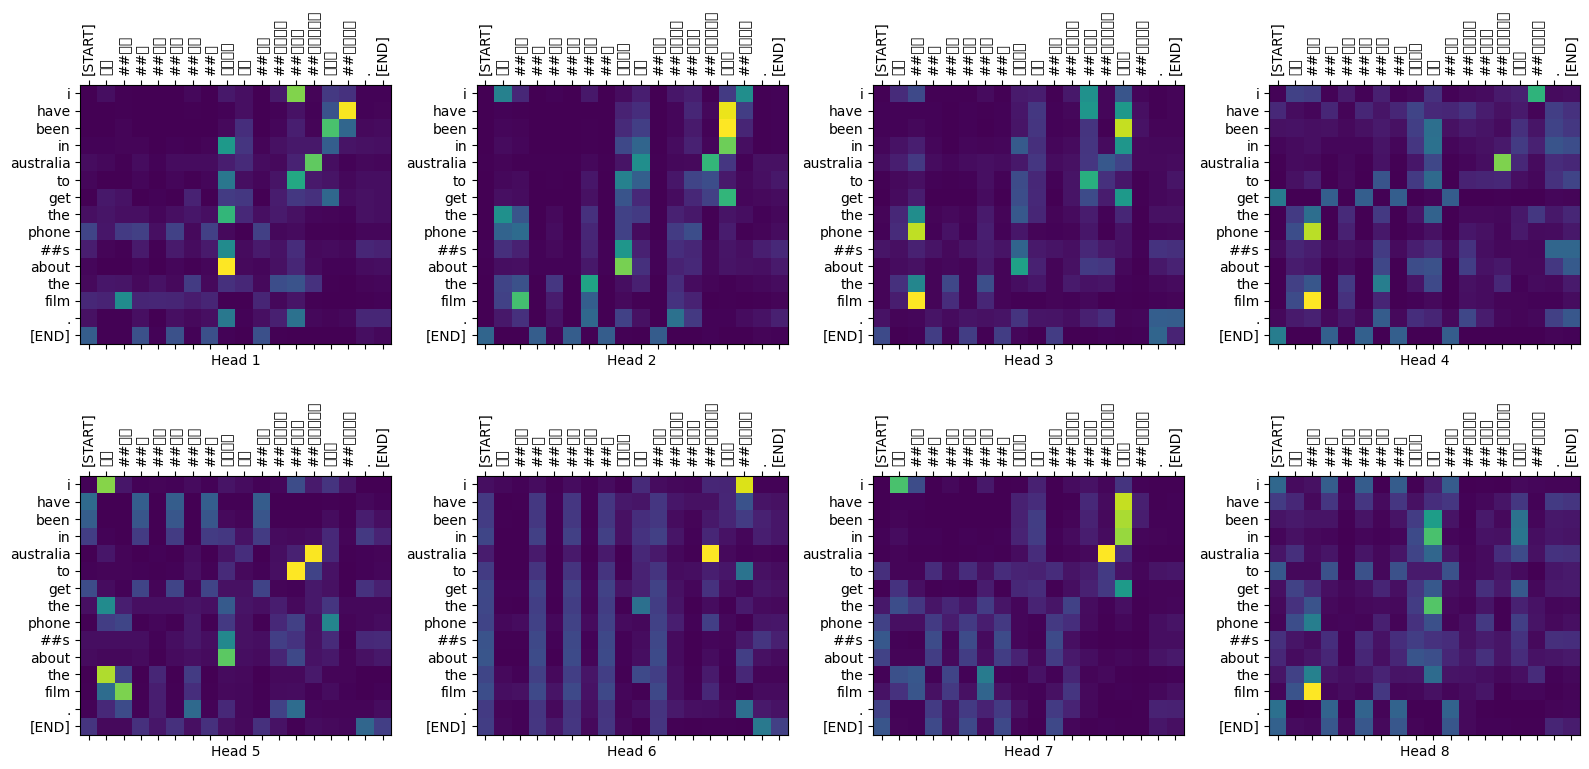

In [107]:
ground_truth = 'I read about triceratops in the encyclopedia.'
sentence = 'டிரைசெராடாப்ஸ் பற்றி என்சைக்ளோபீடியாவில் படித்தேன்.'

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

plot_attention_weights(sentence, translated_tokens, attention_weights[0])

In [108]:
class ExportTranslator(tf.Module):
  def __init__(self, translator):
    self.translator = translator

  @tf.function(input_signature=[tf.TensorSpec(shape=[], dtype=tf.string)])
  def __call__(self, sentence):
    (result,
     tokens,
     attention_weights) = self.translator(sentence, max_length=MAX_TOKENS)

    return result

In [109]:
translator = ExportTranslator(translator)

In [ ]:
translator('இது நான் எழுதிய முதல் புத்தகம்').numpy()

In [110]:
from tensorflow.keras.models import load_model

In [111]:
path = '/content/gdrive/MyDrive/eng_tam/translator_model_v2.h5'
tf.saved_model.save(translator , path)